In [2]:
# ================================
# Uber NYC Pickups – EDA (Jul–Sep 2014)
# ================================

# 1. Librerías y configuración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [4]:
# 2. Carga y unión de datos
patrones = [
    r'C:\Users\elcar\uber-raw-data-jul14.csv',
    r'C:\Users\elcar\uber-raw-data-aug14.csv',
    r'C:\Users\elcar\uber-raw-data-sep14.csv'
]
archivos = [p for p in patrones if Path(p).exists()]
if not archivos:
    archivos = glob.glob('**/uber-raw-data-*.csv', recursive=True)

if not archivos:
    raise FileNotFoundError("No se encontraron los CSV de julio, agosto y septiembre de 2014. Ajusta las rutas y vuelve a ejecutar.")

In [5]:
dfs = []
for f in archivos:
    df_tmp = pd.read_csv(f)
    df_tmp['source_file'] = Path(f).name
    dfs.append(df_tmp)

df = pd.concat(dfs, ignore_index=True)
print("Registros cargados:", len(df))
print(df.head())

Registros cargados: 2653532
          Date/Time      Lat      Lon    Base              source_file
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512  uber-raw-data-jul14.csv
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512  uber-raw-data-jul14.csv
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512  uber-raw-data-jul14.csv
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512  uber-raw-data-jul14.csv
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512  uber-raw-data-jul14.csv


In [6]:
# 3. Limpieza y creación de variables de tiempo
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['year'] = df['Date/Time'].dt.year
df['month'] = df['Date/Time'].dt.month
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['weekday'] = df['Date/Time'].dt.dayofweek  # 0=Lunes
df['weekday_name'] = df['Date/Time'].dt.day_name()


In [7]:
# 4. Métricas descriptivas
total = len(df)
by_month = df.groupby('month').size()
by_hour = df.groupby('hour').size()
by_weekday = df.groupby('weekday_name').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print("\nTotal de pickups:", total)
print("\nPickups por mes:")
print(by_month)
print("\nPickups por hora (primeras horas):")
print(by_hour.head())
print("\nPickups por día de la semana:")
print(by_weekday)


Total de pickups: 2653532

Pickups por mes:
month
7     796121
8     829275
9    1028136
dtype: int64

Pickups por hora (primeras horas):
hour
0    63537
1    42105
2    29369
3    30364
4    34489
dtype: int64

Pickups por día de la semana:
weekday_name
Monday       322110
Tuesday      407808
Wednesday    398346
Thursday     425832
Friday       411789
Saturday     384542
Sunday       303105
dtype: int64


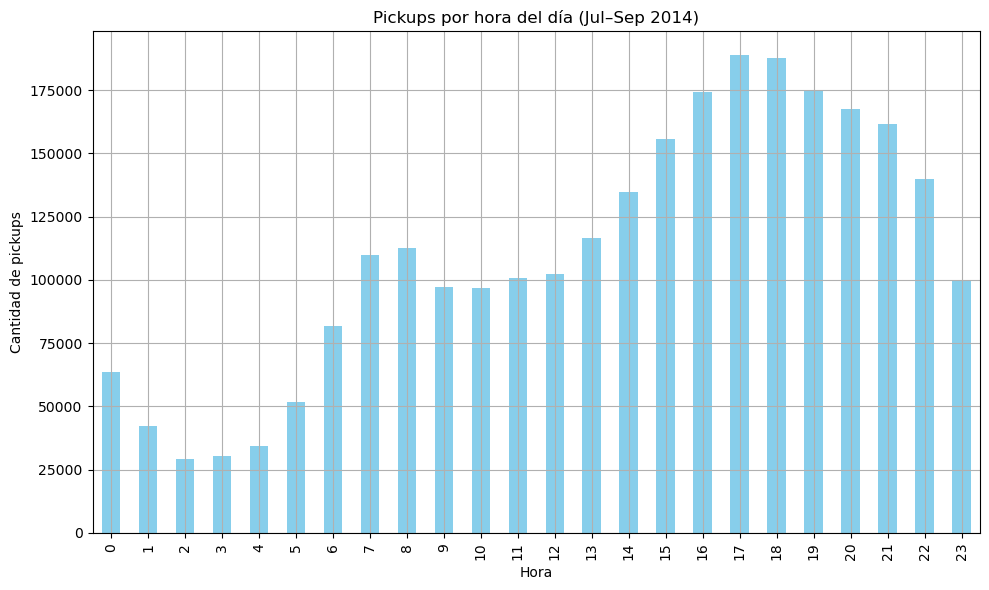

In [8]:
# 5. Visualizaciones

# 5.1 Distribución por hora
counts_hour = df.groupby('hour').size()
plt.figure()
counts_hour.plot(kind='bar', color='skyblue')
plt.title('Pickups por hora del día (Jul–Sep 2014)')
plt.xlabel('Hora')
plt.ylabel('Cantidad de pickups')
plt.tight_layout()
plt.show()


Análisis de Pickups por Hora (Jul–Sep 2014)
El gráfico muestra la cantidad de pickups (servicios iniciados) por cada hora del día, considerando el trimestre de julio a septiembre de 2014.

Observaciones clave:
Patrón bimodal de demanda

Hay dos picos principales:

Mañana: entre las 7:00 y 9:00 AM, coincidiendo con horarios laborales y escolares.

Tarde-noche: entre las 17:00 y 20:00, correspondiente al regreso del trabajo, actividades sociales y ocio nocturno.

Horas de menor actividad

Entre 2:00 y 5:00 AM se registra la menor cantidad de viajes, probablemente debido a que es un horario de baja demanda y menor disponibilidad de conductores.

Tendencia progresiva en la tarde

A partir de las 12:00 PM se observa un aumento sostenido hasta alcanzar el máximo alrededor de las 17:00–18:00, indicando que la tarde-noche es el periodo más activo.

Posible relación con días laborales

Este patrón sugiere una fuerte influencia de rutinas laborales y urbanas, por lo que sería interesante segmentar el análisis entre días laborales y fines de semana para confirmar variaciones.

Implicaciones prácticas:
Planificación de flota: aumentar disponibilidad de vehículos en las horas punta para reducir tiempos de espera.

Estrategias de tarifas dinámicas: aplicar precios diferenciales en los picos para equilibrar la oferta y demanda.

Marketing y promociones: dirigir campañas en horarios valle para incentivar viajes en momentos de baja demanda.

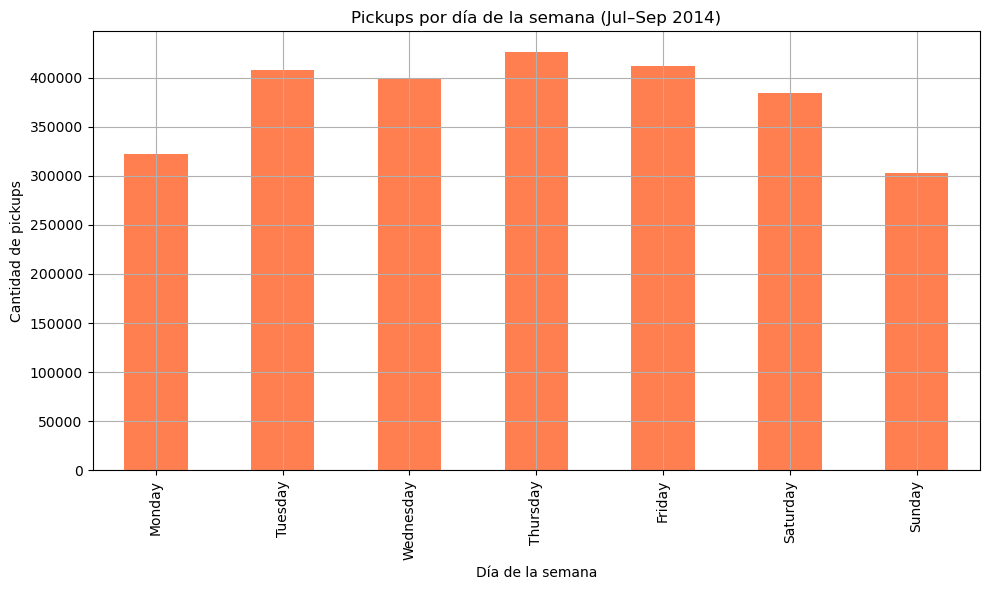

In [9]:
# 5.2 Actividad por día de la semana
counts_wd = df.groupby('weekday_name').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure()
counts_wd.plot(kind='bar', color='coral')
plt.title('Pickups por día de la semana (Jul–Sep 2014)')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de pickups')
plt.tight_layout()
plt.show()

__Pickups por día de la semana__

__Total de viajes por día de la semana en el trimestre.__

Jueves es el día con mayor demanda (aprox. 425k viajes), seguido de martes y viernes (aprox. 410k cada uno).

Miércoles y sábado quedan un poco por debajo (aprox. 400k y aprox. 385k respectivamente).

Lunes presenta una caída notable (aprox. 320k) y domingo es el mínimo (aprox. 300k).

En general, martes–viernes muestran más actividad que el fin de semana, un patrón típico de movilidad laboral/estudiantil.

El hecho de que viernes < jueves sugiere posibles salidas escalonadas, teletrabajo parcial o traslados fuera de hora punta que reducen el total diario pese a tener una tarde/noche muy activa.

Implicación operativa: Concentrar oferta entre martes y viernes, con máxima capacidad los jueves; diseñar incentivos para domingos y lunes si se busca elevar la demanda en esos días.

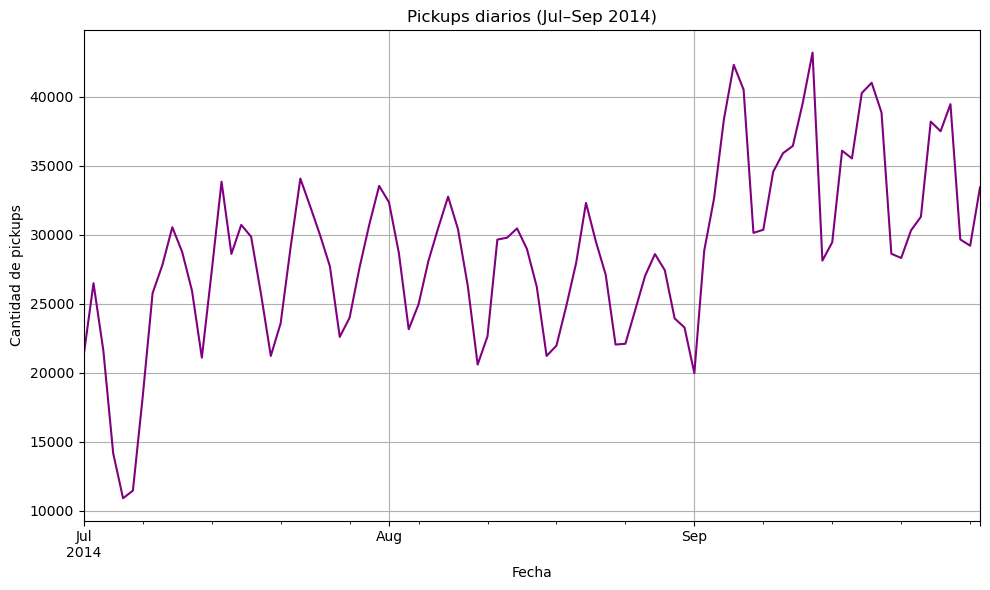

In [10]:
# 5.3 Serie temporal diaria
daily = df.set_index('Date/Time').resample('D').size()
plt.figure()
daily.plot(color='purple')
plt.title('Pickups diarios (Jul–Sep 2014)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pickups')
plt.tight_layout()
plt.show()

__Pickups diarios__

__Evolución día a día durante los tres meses.__

Lecturas clave:

Tendencia ascendente: de aprox 22–26k a inicios de julio hacia  aprox. 35–43k a finales de septiembre, posiblemente reflejando crecimiento orgánico del servicio o el final de una temporada vacacional.

Estacionalidad semanal marcada: “dientes de sierra” con valles recurrentes en domingo/lunes y picos a mitad de semana (miércoles–viernes), consistente con el patrón visto en el gráfico semanal.

Picos puntuales en septiembre (varios días >40k) y valles profundos a inicios de julio (aprox. 11–12k), probablemente asociados a fines de semana largos, festivos o condiciones climáticas.

Volatilidad intrames: aunque hay tendencia al alza, el ciclo semanal es el que domina la variación diaria.

Implicación operativa: Aplicar modelos de pronóstico que incluyan tendencia + estacionalidad semanal; investigar picos de septiembre para identificar eventos disparadores (conciertos, retorno a clases, festividades).

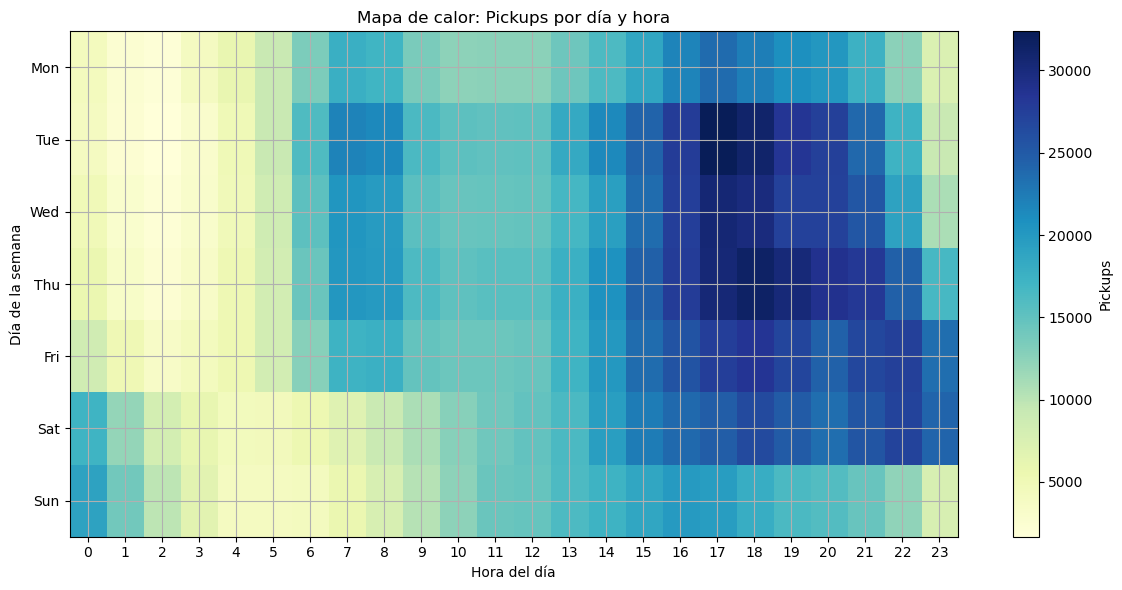

In [11]:
# 5.4 Mapa de calor Día vs Hora
pivot_day_hour = df.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
pivot_day_hour = pivot_day_hour.reindex(index=range(0, 7))
plt.figure(figsize=(12, 6))
plt.imshow(pivot_day_hour, aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Pickups')
plt.yticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xticks(ticks=range(0, 24))
plt.title('Mapa de calor: Pickups por día y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.tight_layout()
plt.show()

__Mapa de calor: Pickups por día y hora__

__Intensidad de viajes por día de la semana (filas) y hora (0–23).__

Lecturas por franja:

Madrugada (0–5 h): Actividad baja en días laborables; repunte en noches de viernes y sábado (0–2 h) por ocio nocturno.

Mañana (6–9 h): Incremento claro de demanda por desplazamientos laborales, especialmente de martes a jueves.

Mediodía (10–15 h): Meseta media, con martes–jueves ya superando al resto.

Tarde–noche (16–20 h): Máximo absoluto del trimestre, con pico entre 17–19 h y mayor intensidad martes–jueves; viernes mantiene niveles altos extendiéndose hasta las 20–21 h.

Sábado: Actividad sostenida de tarde a noche (14–22 h), sin un pico tan pronunciado como en días laborables.

Domingo: Menor intensidad general, con fuerte caída después de las 21 h.

Coherencia con otros gráficos: El pico vespertino de martes–jueves explica que el jueves lidere el total semanal; la baja densidad dominical justifica que sea el día con menor demanda.

Implicación operativa:

Ajustar turnos y precios dinámicos para maximizar disponibilidad en 17–20 h de martes a viernes.

Mantener cobertura en noches de viernes y sábado (0–2 h) en zonas de ocio.

Implementar campañas para incentivar viajes en lunes y domingos y en horas valle (2–5 h).

__Conclusiones accionables__

Planificación de oferta: Priorizar martes–jueves en 17–19 h y viernes tarde-noche.

Estrategia de precios: Aplicar ajustes dinámicos en picos predecibles; revisar impacto de eventos de septiembre.

Experiencia de usuario/conductores: Bonificaciones en domingos/lunes y horas valle para equilibrar la curva de demanda.

Analítica futura: Modelar con tendencia + estacionalidad semanal + variaciones por día/hora; investigar picos/valles atípicos para comprender sus causas.

